<a href="https://colab.research.google.com/github/steffiprog/ML/blob/main/2_classification_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ДОМАШНЕЕ ЗАДАНИЕ

### **Задача:** повторите туториал на датасете **Iris**

**Датасет Iris:**
- 150 примеров цветков ириса
- 3 вида (Setosa, Versicolor, Virginica)
- 4 признака (длина/ширина чашелистика и лепестка)

### **Требования:**
1. **часть 1-2: анализ данных**
   - загрузите датасет `sklearn.datasets.load_iris()`
   - создайте 2 графика распределения классов
   - визуализируйте данные в 2D (выберите 2 любых признака)

2. **часть 3-5: подготовка и обучение**
   - разделите данные 70/30 с `stratify`
   - масштабируйте признаки
   - обучите SVM с линейным ядром

3. **часть 6: эксперименты**
   - попробуйте 3 разных значения C: 0.1, 1, 10
   - сравните accuracy каждой модели
   - выберите лучшую

4. **часть 7-8: оценка**
   - постройте матрицу ошибок для лучшей модели
   - вычислите precision, recall, F1-score
   - найдите и проанализируйте 2 примера ошибок

5. **часть 9: анализ**
   - постройте кривую обучения
   - ответьте: модель переобучается или недообучается?
   - что можно улучшить?

### **Формат сдачи:**
- **Colab ноутбук** с выполненным кодом
- **краткий отчет** (3-5 предложений) с выводами:
  - какая точность достигнута?
  - на каких классах чаще ошибается модель?
  - какие параметры SVM сработали лучше всего?

### **Критерии оценки:**
1. корректная загрузка и анализ данных
2. правильное разделение и масштабирование
3. обучение SVM с разными параметрами (показать, что вы делали как минимум 2 прогона с разными гиперпараметрами, 1 прогон даёт 1 балл)
4. визуализация матрицы ошибок
5. вычисление метрик precision, recall, F1
6. построение кривой обучения
7. представлены ответы на все вопросы из списка требований

### **Дедлайн:** 14 февраля, 23:59 в свои учебные репозитории

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

In [ ]:
# часть 1-2: анализ данных
# загрузите датасет sklearn.datasets.load_iris()

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Размер данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Названия классов: {target_names}")
print(f"Признаки: {feature_names}")

Размер данных: (150, 4)
Количество классов: 3
Названия классов: ['setosa' 'versicolor' 'virginica']
Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


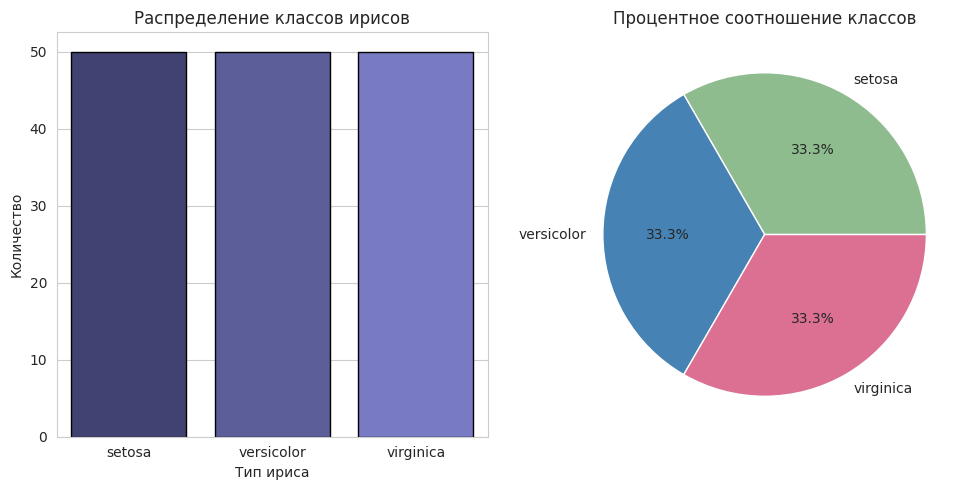

In [ ]:
# создайте 2 графика распределения классов

sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='species', palette='tab20b', hue='species', edgecolor='black')
plt.title('Распределение классов ирисов')
plt.xlabel('Тип ириса')
plt.ylabel('Количество')


plt.subplot(1, 2, 2)
class_counts=df['target'].value_counts()
plt.pie(class_counts, labels=target_names, autopct='%1.1f%%', colors=['darkseagreen', 'steelblue', 'palevioletred'])
plt.title('Процентное соотношение классов')

plt.tight_layout()
plt.show()



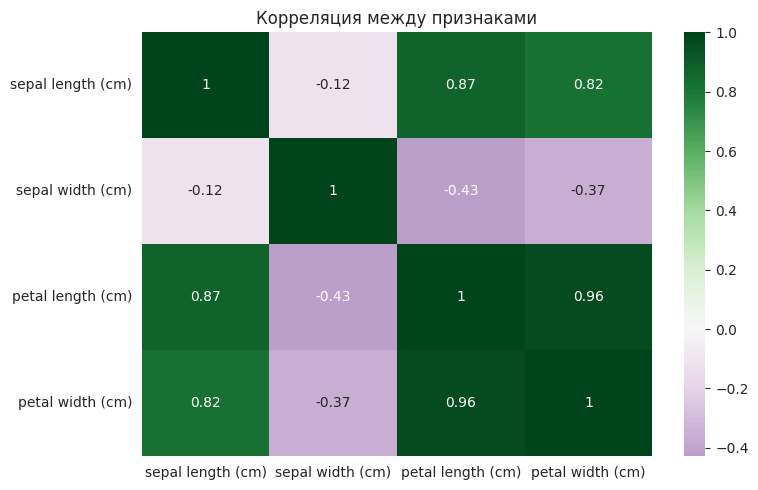

In [ ]:
plt.figure(figsize=(8,5))
corr_matrix = df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='PRGn', center=0)
plt.title('Корреляция между признаками')

plt.tight_layout()
plt.show()

In [ ]:
# меняю название классов для удобства

df.rename(columns={'sepal length (cm)': 'sepal_length',
                   'sepal width (cm)': 'sepal_width',
                   'petal length (cm)': 'petal_length',
                   'petal width (cm)': 'petal_width'}, inplace=True)
feature_names = df.columns[:-1]


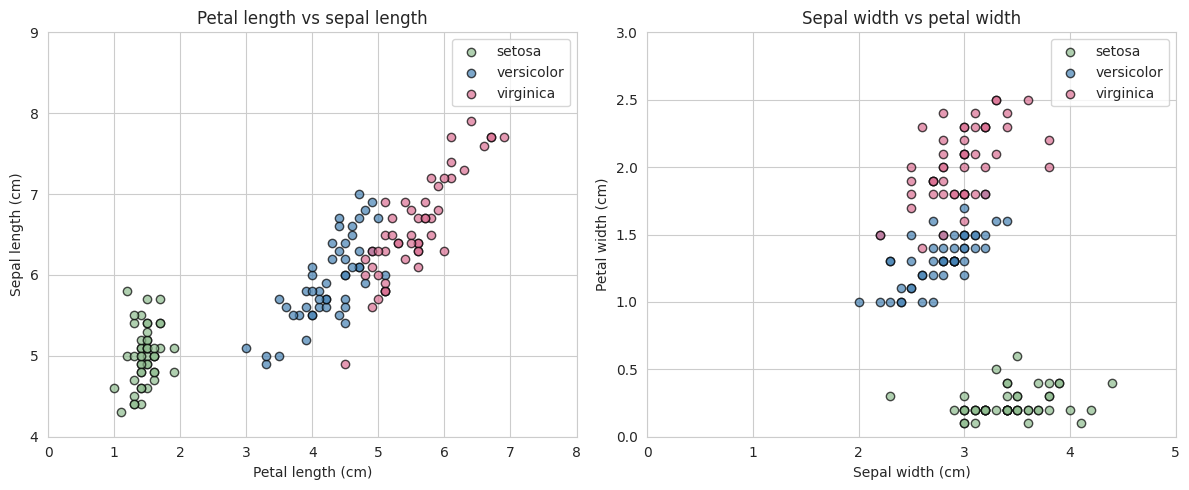

In [ ]:
# визуализируйте данные в 2D (выберите 2 любых признака)
# petal length vs sepal length

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

colors = ['darkseagreen', 'steelblue', 'palevioletred']

for i, iris_class in enumerate(target_names):
    plt.scatter(df[df['target'] == i]['petal_length'],
                df[df['target'] == i]['sepal_length'],
                label=iris_class, alpha=0.7, color=colors[i], edgecolor='black')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.title('Petal length vs sepal length')
plt.ylim(4, 9)
plt.xlim(0, 8)

# sepal width vs petal_width
plt.subplot(1, 2, 2)
for i, iris_class in enumerate(target_names):
    plt.scatter(df[df['target'] == i]['sepal_width'],
                df[df['target'] == i]['petal_width'],
                label=iris_class, alpha=0.7, color=colors[i], edgecolor='black')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Sepal width vs petal width')
plt.ylim(0, 3)
plt.xlim(0, 5)

plt.tight_layout()
plt.show()

In [ ]:
# разделите данные 70/30 с stratify

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Train size: (105, 4)
Test size: (45, 4)
Train class distribution: [35 35 35]
Test class distribution: [15 15 15]


In [ ]:
#масштабируйте признаки

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"До масштабирования: {X_train[0, :]}")
print(f"После масштабирования: {X_train_scaled[0, :]}")


До масштабирования: [5.1 2.5 3.  1.1]
После масштабирования: [-0.90045861 -1.22024754 -0.4419858  -0.13661044]


In [ ]:
# обучите SVM с линейным ядром

svm_lin = SVC(kernel='linear', random_state=42)
svm_lin.fit(X_train_scaled, y_train)
y_pred_lin = svm_lin.predict(X_test_scaled)
accuracy_lin = accuracy_score(y_test, y_pred_lin)

# оценка/анализ
print(f"Смещение: {svm_lin.intercept_}")
print(f"Опорных векторов: {len(svm_lin.support_vectors_)}")
print(f"Accuracy = {accuracy_lin:.2f}")

# вычислите precision, recall, F1-score
print(f"Classification report: {classification_report(y_test, y_pred_lin, target_names=target_names)}")

Смещение: [-1.55282594 -0.27926088  2.74236513]
Опорных векторов: 21
Accuracy = 0.91
Classification report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



C=0.01: accuracy = 86.67%
C=0.1: accuracy = 86.67%
C=1: accuracy = 93.33%
C=10: accuracy = 93.33%


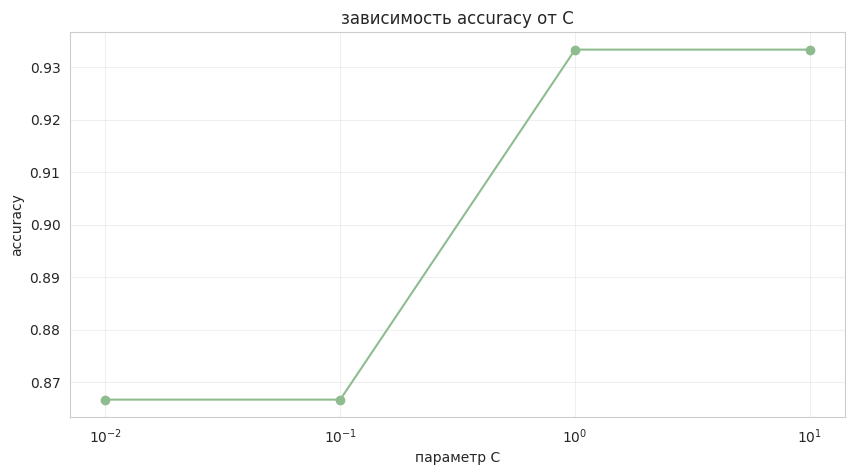

In [ ]:
# попробуйте 3 разных значения C: 0.1, 1, 10

C_values = [0.01, 0.1, 1, 10]
C_accuracies = []

for C in C_values:
    svm_temp = SVC(kernel='rbf', C=C, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    accuracy = svm_temp.score(X_test_scaled, y_test)
    C_accuracies.append(accuracy)
    print(f"C={C}: accuracy = {accuracy:.2%}")

# визуализация изменений accuracy в зависимости от C
plt.figure(figsize=(10, 5))
plt.plot(C_values, C_accuracies, marker='o', color='darkseagreen')
plt.xscale('log')
plt.xlabel('параметр C')
plt.ylabel('accuracy')
plt.title('зависимость accuracy от C')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# сравните accuracy каждой модели
# выберите лучшую

best_svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM by accuracy: {accuracy_best:.2%}")

# таких SVM было две, с С = 1 и C = 10, теоретически лучшими можно считать обе, но так как высокое C детальнее классифицирует обучающие примеры и достаточным значением в данном случае стало 1 (10 не меняет точности), значит, лучшим можно считать вариант с C=1

Best SVM by accuracy: 93.33%


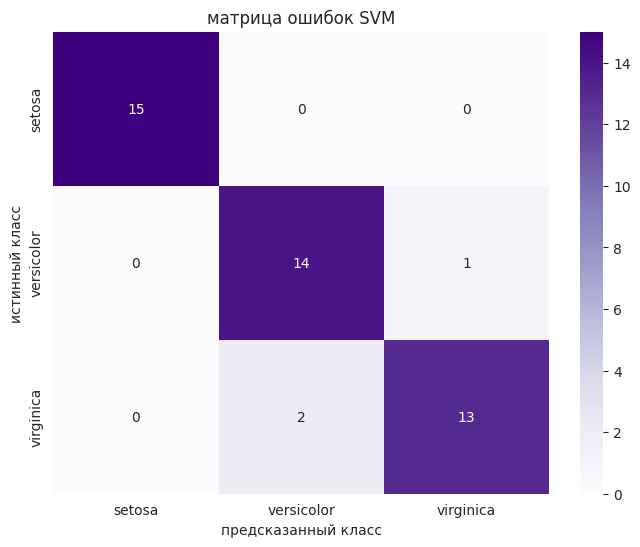

In [ ]:
# вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_best)

# визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('предсказанный класс')
plt.ylabel('истинный класс')
plt.title('матрица ошибок SVM')
plt.show()

In [ ]:
# найдите и проанализируйте 2 примера ошибок

error_indices = np.where(y_pred_best != y_test)[0]
print(f"количество ошибок: {len(error_indices)}")

if len(error_indices) > 0:
    print("примеры ошибок:")

    for i, idx in enumerate(error_indices[:2]):
        print(f"ошибка {i+1}:")
        print(f"  истинный класс: {target_names[y_test[idx]]}")
        print(f"  предсказанный:  {target_names[y_pred_best[idx]]}")
        print(f"  вероятности классов: {best_svm.decision_function(X_test_scaled[idx:idx+1])}")

количество ошибок: 3
примеры ошибок:
ошибка 1:
  истинный класс: virginica
  предсказанный:  versicolor
  вероятности классов: [[-0.23222733  2.20414076  1.13916713]]
ошибка 2:
  истинный класс: virginica
  предсказанный:  versicolor
  вероятности классов: [[-0.22960759  2.18724266  1.16079295]]


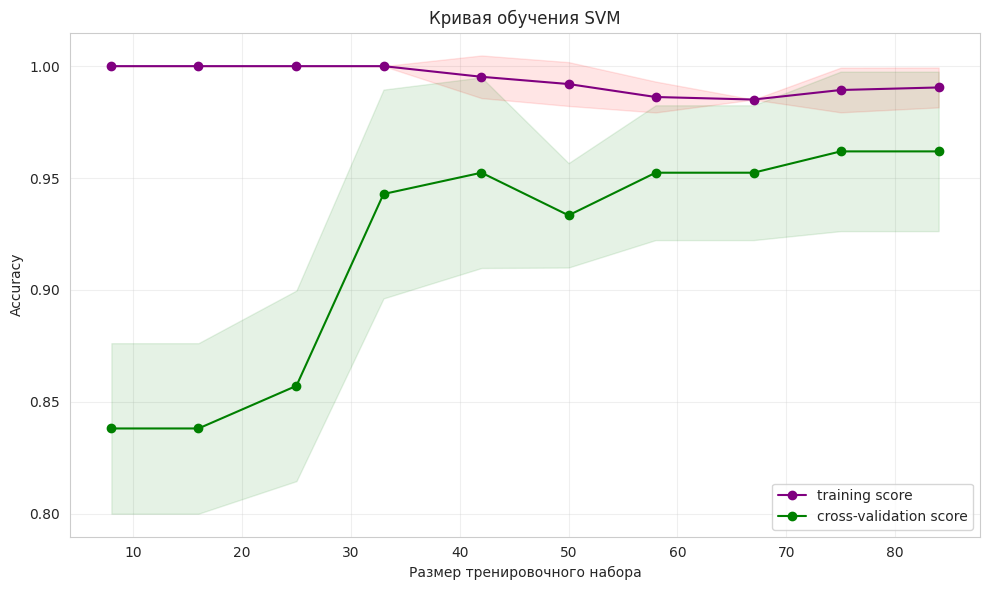

In [ ]:
# постройте кривую обучения

train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='purple', label='training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Размер тренировочного набора')
plt.ylabel('Accuracy')
plt.title('Кривая обучения SVM')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. **Модель переобучается или недообучается?**
Так как кривые в конечном итоге выравниваются на обучающем и валидационном примере, можно сказать, что модель не переобучается и не недообучается, баланс найден.

2. **Что можно улучшить?**
Увеличить количество данных и посмотреть на метрики и точность в таком случае, также можно экспериментировать дальше с gamma (можно было бы сказать с гиперпараметрами, но кажется, что оптимальное С уже найдено).

3. **Какая точность достигнута?**
Accuracy = 0,91, precision = 0,92.

4. **На каких классах чаще ошибается модель?**
Versicolor/virginica.

5. **Какие параметры SVM сработали лучше всего?**
Лучше всего сработали параметры: С = 1.0, random_state = 42.
